In [1]:
import graph_tool.all as gt
from packing_coloring.graph_generator import *
from packing_coloring.utils import *
from packing_coloring.algorithms.problem import *

from packing_coloring.algorithms.constructive.swo_algo import *

import numpy as np
import pandas as pd
import igraph
np.set_printoptions(threshold=np.nan)

from IPython.html.widgets import interactive
from IPython.display import display
from os import listdir
from os.path import join, isfile
from pylab import get_cmap

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
def square_grid_swo_pcoloring(size, file_name="test.pdf", out_size=(250,250), font_size=22):
    g = gt.lattice([size, size])
    dist_mat = get_distance_matrix(g)
    prob = GraphProblem(dist_mat)

    p_col1 = swo_algorithm(prob, random_init=False, blame_value=5, iter_count=500)

    pos = gt.sfdp_layout(g, max_iter=1)
    for i,v in enumerate(g.vertices()):
        pos[v][0] = (i%size)*2
        pos[v][1] = np.floor(i/size)*2

    max_col = p_col1.get_max_col()
    col = [c/max_col for c in p_col1]
    col_v = g.new_vertex_property("float")
    col_v.a = np.array(col)

    text_v = g.new_vertex_property("int")
    text_v.a = p_col1.pack_col.astype(int)

    gt.graph_draw(g, pos=pos, vertex_text=text_v, vertex_font_size=font_size, output_size=out_size, vertex_fill_color=col_v, vcmap=get_cmap("Set1"), output=file_name)
    gt.graph_draw(g, pos=pos, vertex_text=text_v, vertex_font_size=font_size, vertex_fill_color=col_v, vcmap=get_cmap("Set1"), inline=True)

    print(np.max(p_col1))
    print(p_col1)
    
def random_swo_pcoloring(file_name="test.pdf", out_size=(250,250), font_size=16):
    g = gt.load_graph("instances/dot_format/random.dot")
    dist_mat = get_distance_matrix(g)
    prob = GraphProblem(dist_mat)

    p_col1 = swo_algorithm(prob, random_init=True)

    pos = gt.sfdp_layout(g, cooling_step=0.95, epsilon=1e-2)
    max_col = p_col1.get_max_col()
    col = [c/max_col for c in p_col1]
    col_v = g.new_vertex_property("float")
    col_v.a = np.array(col)

    text_v = g.new_vertex_property("int")
    text_v.a = p_col1.pack_col.astype(int)

    gt.graph_draw(g, pos=pos, vertex_text=text_v, vertex_font_size=font_size, output_size=out_size, vertex_fill_color=col_v, vcmap=get_cmap("Set1"), output=file_name)
    gt.graph_draw(g, pos=pos, vertex_text=text_v, vertex_font_size=font_size, vertex_fill_color=col_v, vcmap=get_cmap("Set1"), inline=True)

    print(np.max(p_col1))
    print(p_col1)

# Packing coloration of 3x3 grid using SWO

5 5
5.0 6
5.25 6
5.4375 6
5.578125 6
5.68359375 5
5.5126953125 4
5.13452148438 4
4.85089111328 4
4.63816833496 5
4.72862625122 4
4.54646968842 5
4.65985226631 4
4.49488919973 5
4.6211668998 5
4.71587517485 6
5.03690638114 6
5.27767978585 4
4.95825983939 5
4.96869487954 6
5.22652115966 6
5.41989086974 6
5.56491815231 6
5.67368861423 7
6.00526646067 6
6.0039498455 4
5.50296238413 4
5.1272217881 4
4.84541634107 4
4.6340622558 5
4.72554669185 5
4.79416001889 6
5.09562001417 5
5.07171501063 6
5.30378625797 5
5.22783969348 5
5.17087977011 4
4.87815982758 4
4.65861987069 5
4.74396490301 5
4.80797367726 4
4.60598025795 5
4.70448519346 5
4.77836389509 5
4.83377292132 4
4.62532969099 5
4.71899726824 5
4.78924795118 5
4.84193596339 4
4.63145197254 5
4.7235889794 4
4.54269173455 5
4.65701880092 4
4.49276410069 5
4.61957307551 5
4.71467980664 4
4.53600985498 5
4.65200739123 4
4.48900554342 5
4.61675415757 5
4.71256561818 5
4.78442421363 4
4.58831816022 5
4.69123862017 4
4.51842896513 5
4.6388217238

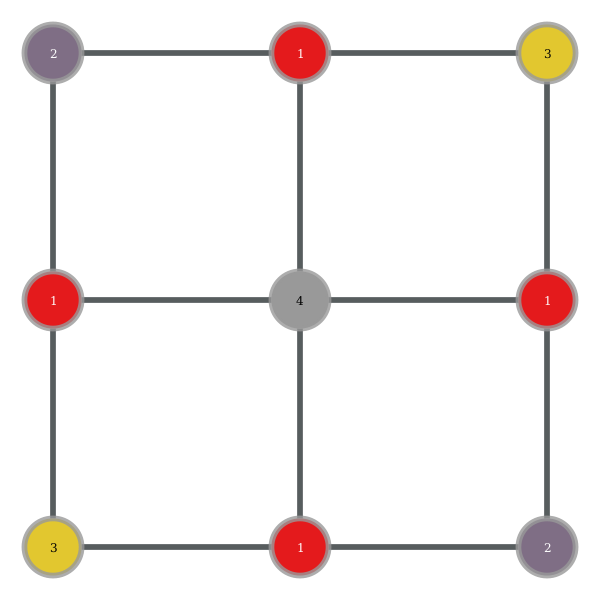

4
[2 1 3 1 4 1 3 1 2]


In [3]:
square_grid_swo_pcoloring(3, file_name="../Report/Pictures/SWO_G3-3.pdf", out_size=(105, 150), font_size=12)

# Packing coloration of 24x24 grid using SWO

22
24
24
24
25
24
24
25
27
26
24
25
24
24
25
25
25
24
23
25
24
26
23
24
25
25
26
23
25
23
25
25
24
24
24
26
26
24
25
24
25
26
24
24
23
25
25
24
24
23
24
24
23
26
26
25
25
25
23
24
23
23
25
25
25
25
25
24
24
25
23
23
23
25
24
24
23
24
23
22
22
23
23
25
25
23
23
24
23
23
26
26
24
24
24
24
24
26
25
24
23
24
23
23
25
24
24
26
24
23
24
24
23
25
23
24
24
23
24
24
24
24
24
23
23
25
23
24
23
25
22
23
22
23
22
24
25
24
23
23
25
23
24
23
23
24
25
24
23
26
24
25
24
25
25
23
24
25
25
22
23
25
25
26
26
23
24
24
25
24
24
25
26
24
24
24
25
23
23
23
24
24
25
24
25
26
24
23
24
24
25
26
26
25
26
26
23
24
24
24
24
26
25
24
26
24
24
25
25
26
23
24
25
25
25
25
26
23
24
25
26
22
23
22
23
23
25
26
24
24
25
25
24
25
26
25
23
24
23
26
25
24
24
25
25
24
25
24
25
25
27
23
23
25
27
24
24
24
27
24
24
24
23
24
23
24
25
24
24
24
22
24
25
25
24
25
25
25
25
23
24
25
24
23
23
24
24
24
27
25
27
24
23
26
24
26
24
26
24
25
24
25
23
24
26
24
25
23
23
24
23
25
25
23
24
25
24
25
25
23
23
25
24
24
26
24
23
22
23
23
24
25
24
2

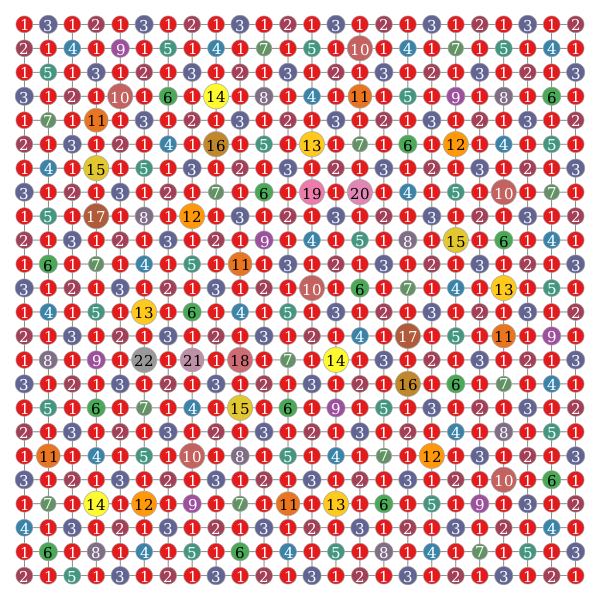

22
[ 1  3  1  2  1  3  1  2  1  3  1  2  1  3  1  2  1  3  1  2  1  3  1  2  2
  1  4  1  9  1  5  1  4  1  7  1  5  1 10  1  4  1  7  1  5  1  4  1  1  5
  1  3  1  2  1  3  1  2  1  3  1  2  1  3  1  2  1  3  1  2  1  3  3  1  2
  1 10  1  6  1 14  1  8  1  4  1 11  1  5  1  9  1  8  1  6  1  1  7  1 11
  1  3  1  2  1  3  1  2  1  3  1  2  1  3  1  2  1  3  1  2  2  1  3  1  2
  1  4  1 16  1  5  1 13  1  7  1  6  1 12  1  4  1  5  1  1  4  1 15  1  5
  1  3  1  2  1  3  1  2  1  3  1  2  1  3  1  2  1  3  3  1  2  1  3  1  2
  1  7  1  6  1 19  1 20  1  4  1  5  1 10  1  7  1  1  5  1 17  1  8  1 12
  1  3  1  2  1  3  1  2  1  3  1  2  1  3  1  2  2  1  3  1  2  1  3  1  2
  1  9  1  4  1  5  1  8  1 15  1  6  1  4  1  1  6  1  7  1  4  1  5  1 11
  1  3  1  2  1  3  1  2  1  3  1  2  1  3  3  1  2  1  3  1  2  1  3  1  2
  1 10  1  6  1  7  1  4  1 13  1  5  1  1  4  1  5  1 13  1  6  1  4  1  5
  1  3  1  2  1  3  1  2  1  3  1  2  2  1  3  1  2  1  3  1  2  1  3  1  2
  1  4  1

In [3]:
square_grid_swo_pcoloring(24, file_name="../Report/Pictures/SWO_G24-24.pdf", out_size=(500, 500), font_size=15)

15
17
17
18
16
15
18
16
16
15
18
19
17
19
18
17
16
17
17
16
18
16
17
16
16
16
21
16
19
16
19
18
18
17
18
14
17
14
17
17
17
17
14
14
17
15
18
14
15
14
18
16
18
16
17
19
16
18
15
19
15
19
17
15
18
16
21
14
19
15
16
20
16
16
18
14
18
15
16
18
16
18
16
17
16
16
17
16
16
14
15
17
19
15
18
17
18
16
17
17
15
21
14
17
17
16
17
17
17
17
18
14
16
17
16
15
15
19
16
19
17
15
17
14
16
18
17
16
16
16
15
18
17
16
15
19
19
17
17
16
17
17
16
15
18
18
18
16
17
19
18
14
18
17
16
15
16
16
15
18
18
15
17
16
15
15
18
19
16
15
15
18
19
17
14
16
16
17
16
15
16
15
17
16
17
15
15
14
15
18
15
16
14
16
15
17
15
16
15
17
16
15
16
14
17
15
16
15
16
17
17
15
16
15
15
19
16
15
14
19
17
17
18
17
16
16
16
19
16
18
17
19
14
17
17
15
16
17
16
17
14
17
15
16
16
17
17
16
15
16
16
14
14
18
15
17
16
16
18
16
16
15
16
17
15
16
16
18
15
20
19
16
16
17
16
15
17
17
20
16
18
18
15
15
17
20
17
17
15
15
19
16
16
17
18
19
15
14
16
17
15
17
17
16
16
16
18
17
15
16
15
18
15
18
15
17
15
17
17
15
16
19
16
19
17
17
15
18
15
16
16
16
15
1

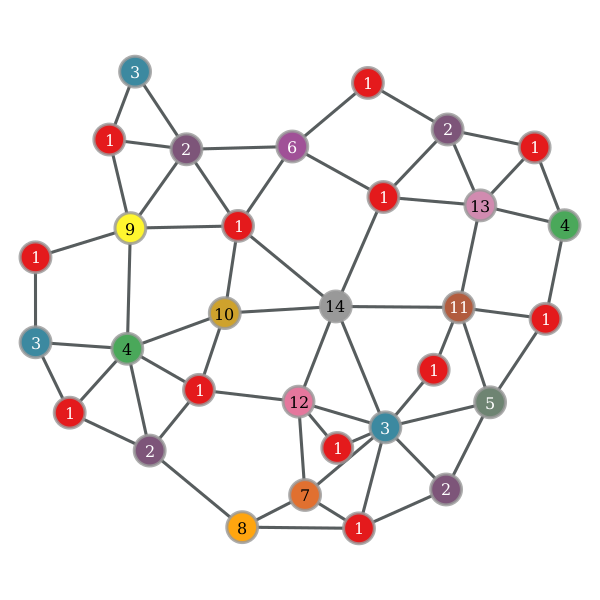

14
[ 1  3  1 11 13 12 14  1  2  2  1  2 10  1  6  1  1  4  9  2  3  1  5  1  3
  1  4  1  8  7  1]


In [5]:
random_swo_pcoloring(file_name="../Report/Pictures/SWO_Random.pdf", out_size=(250,250), font_size=16)